In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
mkdir /root/.kaggle

In [3]:
! echo '{"username":"roohisharma","key":"de5a8a73ee3eef2abf7bcd0a1267c8cd"}'>/root/.kaggle/kaggle.json

In [4]:
! chmod 600 /root/.kaggle/kaggle.json

In [5]:
! kaggle competitions download -c dogs-vs-cats-redux-kernels-edition

  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 41.1MB/s]
 96% 521M/544M [00:06<00:00, 52.0MB/s]
100% 544M/544M [00:06<00:00, 92.0MB/s]
 98% 267M/271M [00:01<00:00, 162MB/s]
100% 271M/271M [00:01<00:00, 152MB/s]


In [ ]:
! unzip train.zip

In [ ]:
! mkdir data

In [ ]:
!mkdir data/train
!mkdir data/train/cats
!mkdir data/train/dogs

In [ ]:
!mkdir data/validation
!mkdir data/validation/cats
!mkdir data/validation/dogs

In [ ]:
#Directory structure
!cd data
!tree data

data
├── train
│   ├── cats
│   └── dogs
└── validation
    ├── cats
    └── dogs

6 directories, 0 files


In [ ]:
#Move 1000 images each of cats and dogs into their respective training folders
! bash -c "mv train/cat.{0..999}.jpg data/train/cats"
! bash -c "mv train/dog.{0..999}.jpg data/train/dogs"

In [ ]:
#Move 800 images each of cats and dogs into their respective validation folders
! bash -c "mv train/cat.{1000..1399}.jpg data/validation/cats"
! bash -c "mv train/dog.{1000..1399}.jpg data/validation/dogs"

In [ ]:
#Processing image data
import os
import cv2
import numpy as np

labels = ['cats', 'dogs']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label) #encoding categories into numbers 0:Cat , 1:Dog
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))
                img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB) #cv2 reads img in BGR by default
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
# fetch train and validation data using the above defined function.
train = get_data('/content/data/train')
val = get_data('/content/data/validation')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
#Make lists of 5 images from each of the two categories in order to visualize a sample the dataset
cats=[]
dogs=[]
count=0

for img,category in train:
  if category == 0: 
    cats.append(img)
    count=count+1
  if count == 5:
    break  

count=0
for img,category in train:
  if category == 1: 
    dogs.append(img)
    count=count+1
  if count == 5:
    break     

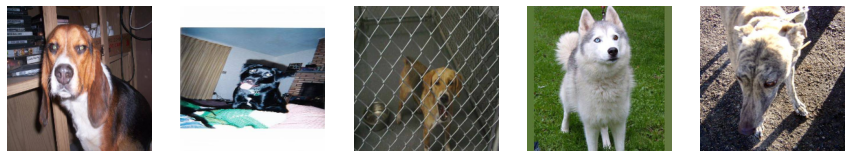

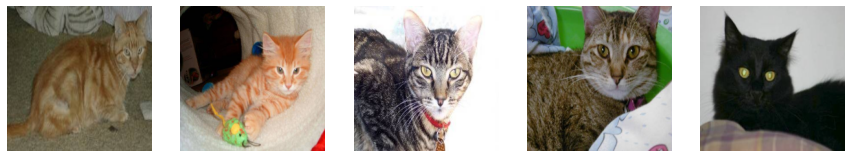

In [ ]:
#Few random images from each category to visualize the dataset used
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,5,figsize=(15,15))

for i in range(5):
    ax[i].imshow(dogs[i])
    ax[i].axis('off')
plt.show()

f,ax = plt.subplots(1,5,figsize=(15,15))

for i in range(5):
    ax[i].imshow(cats[i])
    ax[i].axis('off')
plt.show()

In [ ]:
#Image pre processing and splitting dataset into training and validation set
x_train = []
y_train = []
x_val = []
y_val = []

for img, img_category in train:
  x_train.append(img)
  y_train.append(img_category)

for img, img_category in val:
  x_val.append(img)
  y_val.append(img_category)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

#reshape into (total_images,img_size,img_size,channels)
x_train.reshape(-1, img_size, img_size, 3) #shape: (2000,224,224,3)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 3)  #shape: (800,224,224,3)
y_val = np.array(y_val)

In [ ]:
#Data augmentation to increase the nmber of training samples
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(

        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dropout,Dense,Activation
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())


model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [ ]:
#callbacks to stop the model training once optimal weights have been reached
from keras.callbacks import ModelCheckpoint,EarlyStopping
metric = 'val_acc'
checkpoint = ModelCheckpoint("best.h5",
                             monitor = 'val_loss',
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             verbose=0,
                             save_freq='epoch',
                             )

early = EarlyStopping(monitor='val_loss',
                      min_delta=0,
                      patience=10,
                      verbose=0,
                      mode='auto')


In [ ]:
opt = Adam(lr=0.0001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train,y_train,epochs = 100 , validation_data = (x_val, y_val),callbacks=[early,checkpoint])
model.save('save_model.h5')

Epoch 1/100
63/63 [==============================] - 36s 61ms/step - loss: 0.7096 - accuracy: 0.4835 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6915 - accuracy: 0.5090 - val_loss: 0.6913 - val_accuracy: 0.5275
Epoch 3/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6869 - accuracy: 0.5456 - val_loss: 0.6807 - val_accuracy: 0.5938
Epoch 4/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6680 - accuracy: 0.5881 - val_loss: 0.6678 - val_accuracy: 0.5713
Epoch 5/100
63/63 [==============================] - 3s 43ms/step - loss: 0.6566 - accuracy: 0.6016 - val_loss: 0.6467 - val_accuracy: 0.6187
Epoch 6/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6260 - accuracy: 0.6513 - val_loss: 0.6367 - val_accuracy: 0.6225
Epoch 7/100
63/63 [==============================] - 3s 42ms/step - loss: 0.6122 - accuracy: 0.6674 - val_loss: 0.6329 - val_accuracy: 0.6313
Epoch

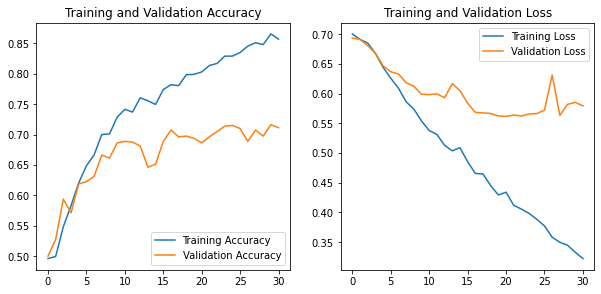

In [ ]:
import matplotlib.pyplot as plt

#plotting validation loss and validation accuracy over 31 epochs

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(31)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Cats (Class 0)','Dogs (Class 1)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                precision    recall  f1-score   support

Cats (Class 0)       0.74      0.65      0.69       400
Dogs (Class 1)       0.69      0.78      0.73       400

      accuracy                           0.71       800
     macro avg       0.72      0.71      0.71       800
  weighted avg       0.72      0.71      0.71       800



#**Making use of transfer learning**

In [ ]:
from tensorflow.keras.applications import VGG16
vgg_base = VGG16(weights='imagenet',    # use weights for ImageNet
                 include_top=False,     # drop the Dense layers!
                 input_shape=(224,224, 3))
print(vgg_base.summary())

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model = Sequential([
        #vgg16_base model added as a layer
        vgg_base,
        #custom prediction layer according to the input data
        Flatten(),
        Dropout(0.50),
        Dense(1024, activation='relu'),
        Dropout(0.20),        
        Dense(512, activation='relu'),
        Dropout(0.10),         
        Dense(1, activation='sigmoid')    
    ])

In [ ]:
vgg_base.trainable = False

In [ ]:
model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 5 , validation_data = (x_val, y_val))
model.save('save_pretrained.h5')

Epoch 1/5
63/63 [==============================] - 774s 12s/step - loss: 0.5648 - accuracy: 0.6984 - val_loss: 0.3340 - val_accuracy: 0.8575
Epoch 2/5
63/63 [==============================] - 791s 13s/step - loss: 0.2320 - accuracy: 0.8972 - val_loss: 0.2043 - val_accuracy: 0.9187
Epoch 3/5
63/63 [==============================] - 790s 13s/step - loss: 0.1492 - accuracy: 0.9398 - val_loss: 0.1770 - val_accuracy: 0.9225
Epoch 4/5
63/63 [==============================] - 789s 13s/step - loss: 0.1387 - accuracy: 0.9390 - val_loss: 0.1816 - val_accuracy: 0.9275
Epoch 5/5
63/63 [==============================] - 790s 13s/step - loss: 0.1008 - accuracy: 0.9661 - val_loss: 0.1957 - val_accuracy: 0.9250


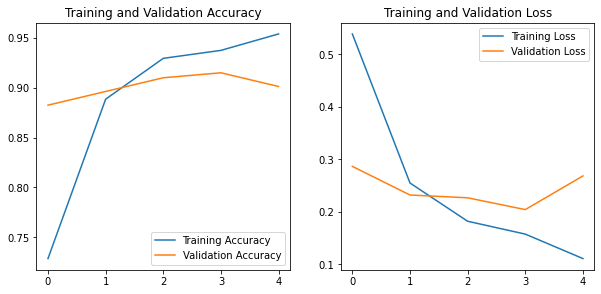

In [ ]:
import matplotlib.pyplot as plt

#plotting validation loss and validation accuracy over 19 epochs

acc = hist2.history['accuracy']
val_acc = hist2.history['val_accuracy']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = ['Cats (Class 0)','Dogs (Class 1)']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


                precision    recall  f1-score   support

Cats (Class 0)       0.91      0.94      0.93       400
Dogs (Class 1)       0.94      0.91      0.92       400

      accuracy                           0.93       800
     macro avg       0.93      0.93      0.92       800
  weighted avg       0.93      0.93      0.92       800



In [ ]:
#from google.colab import files
#files.upload()

In [12]:
#Function that uses above built model to classify images
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image

def classify(img_path):
  model = keras.models.load_model('/content/drive/MyDrive/save_pretrained.h5')
  img = image.load_img(img_path,target_size=(224,224))
  print("Image : \n")
  plt.imshow(img)
  plt.show()
  img_arr = image.img_to_array(img)          #(height, width, channels)
  img_arr = np.expand_dims(img_arr, axis=0)  #(1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)    img_tensor /= 255.  
  result=model.predict(img_arr)
  if result[0][0] > 0.5 :
    print('\tPredicted label: Dog')
  else:
    print('\tPredicted label:Cat')


Image : 



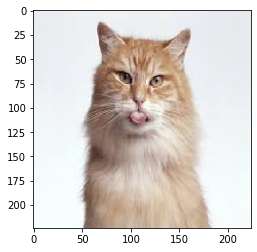

	Predicted label:Cat
Image : 



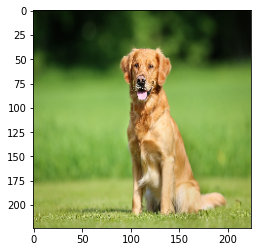

	Predicted label: Dog


In [13]:
cat_path = '/content/cat.jpg'
classify(cat_path)

dog_path = '/content/dog.jpg'
classify(dog_path)